In [1]:
import sys
#add directory to path to allow importing of modules if not already in path
if "/home/d.gaillard/source/NIPTov-analysis-tools" not in sys.path:
    sys.path.append("/home/d.gaillard/source/NIPTov-analysis-tools")


import WCR_analysis_tools
from importlib import reload
reload(WCR_analysis_tools)
from WCR_analysis_tools import *

In [2]:
# get label data
label_df = pd.read_csv('/home/d.gaillard/paired_ovarian/label_data/labels.csv')
label_df = label_df.set_index('PGDXID')
labels = label_df.loc[:, 'Lesion_Type']


In [3]:
def align_yaxes(ax1, ax2):
    # get limits
    y_lims = [ax.get_ylim() for ax in [ax1, ax2]]

    # take extreme values for limits
    y_min = min([y[0] for y in y_lims])
    y_max = max([y[1] for y in y_lims])

    # set limits
    ax1.set_ylim(y_min, y_max)
    ax2.set_ylim(y_min, y_max)

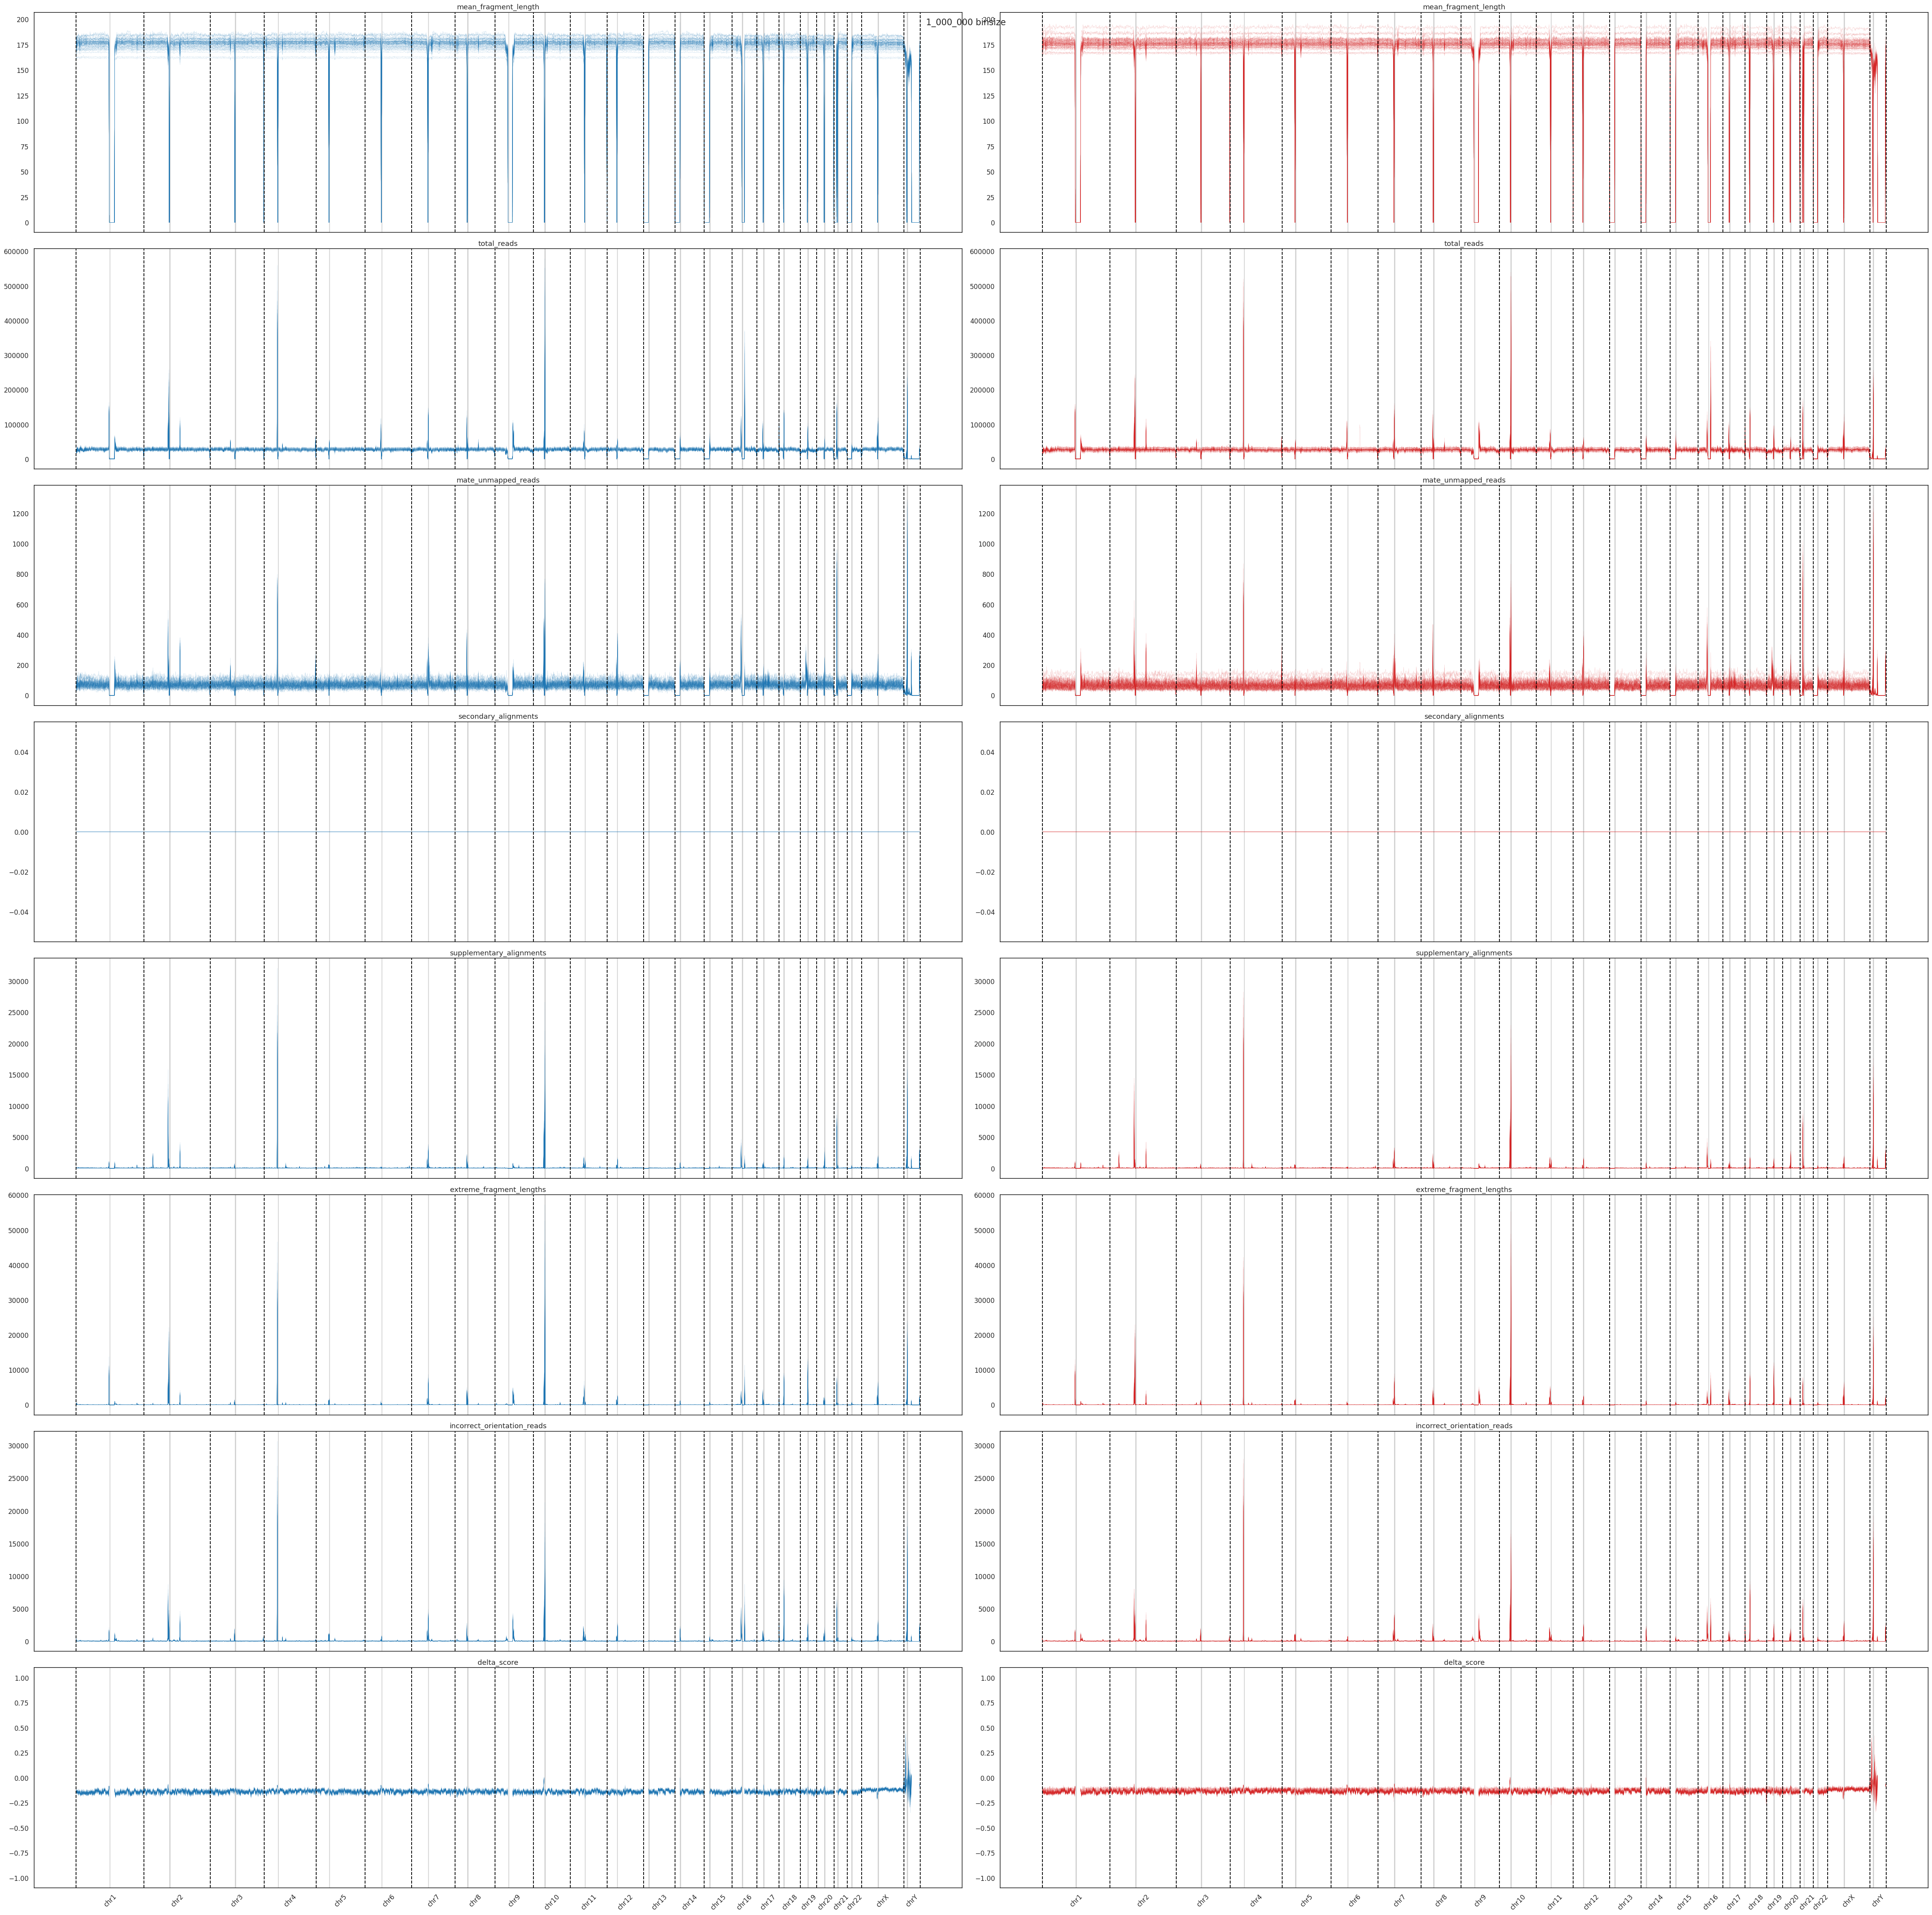

In [6]:
# list of sample dataframes
from pathlib import Path
base = Path('/home/d.gaillard/paired_ovarian/fragment_lengh_distibution/binwise_fragmentomics')

data = {}

for file in base.glob('*b1000000_*.csv'):
    # get label
    PGDXID = file.stem.split('_')[0]
    lab = labels.loc[PGDXID]
    data[PGDXID] = {'label': lab}

    # read file
    df = pd.read_csv(file, sep='\t')
    data[PGDXID]['df'] = df
    

# code to plot all features 

# first deterime how many subplots we need under each other. 1 per feature
df1 = data[list(data.keys())[0]]['df']
features = df1.columns[3:].tolist()
fig, axs = plt.subplots(len(features), 2, figsize=(50, 50), sharex=True)

for i, feature in enumerate(features):
    for ax in axs[i, :]:
        ax.set_title(feature)
    for PGDXID in data.keys():
        df = data[PGDXID]['df']
        label = data[PGDXID]['label']
        if label == 'Malignant':
            is_malignant = 1
            color = 'tab:red'
        else:
            is_malignant = 0
            color = 'tab:blue'

        vector = df.loc[:, feature].values
        axs[i, is_malignant].plot(vector, alpha=0.2, color=color, linewidth=0.5)

#next for labeling the xaxis we need to know the number of bins for each chromosome.
# count the number of occurences of each chromosome in the sample_dfs[0]
chromosome_counts = df1.iloc[:, 0].value_counts().to_dict()
chromosome_ordered = df1.iloc[:, 0].unique().tolist()

# cumulatively sum the counts to get the end of each chromosome
chromosome_ends = np.cumsum([chromosome_counts[chromosome] for chromosome in chromosome_ordered])
chromosome_ends = np.insert(chromosome_ends, 0, 0)

# plot the chromosome ends as vertical lines over all the subplots
for chromosome_end in chromosome_ends:
    for ax in axs.ravel():
        ax.axvline(chromosome_end, color='black', linestyle='--')

# now we can plot the xaxis labels between the start and the end of each chromosome
# the start is the previous chromosome end, and the end is the current chromosome end using xtick labels
# set xticks to the middle of each chromosome
xticks = [(chromosome_ends[i] + chromosome_ends[i+1])/2 for i in range(len(chromosome_ends)-1)]
# set xtick labels to the chromosome names
xtick_labels = chromosome_ordered
# set xticks and xtick labels for each subplot
for ax in axs.ravel():
    ax.set_xticks(xticks)
    ax.set_xticklabels(xtick_labels, rotation=45)

## load centromere data
centromere_df = pd.read_csv('/home/d.gaillard/paired_ovarian/fragment_lengh_distibution/data/hg19_centromere.bed', sep='\t', header=None)
# drop last column
centromere_df = centromere_df.iloc[:, :-1]
# rename columns
centromere_df.columns = ['chromosome', 'start', 'end']

# draw lightgrey rectangles over the centromere regions for each chromosome first determine which bin contains the centromere start and end. then draw a rectangle over the corresponding xaxis region
for i, chromosome in enumerate(chromosome_ordered):
    centromere_start = centromere_df[centromere_df['chromosome'] == chromosome]['start'].values[0]
    centromere_end = centromere_df[centromere_df['chromosome'] == chromosome]['end'].values[0]

    # determine which row contains the centromere start and end
    start_row = np.where(df1.iloc[:, 1].values > centromere_start)[0][0] + chromosome_ends[i]
    end_row = np.where(df1.iloc[:, 2].values > centromere_end)[0][0] + chromosome_ends[i]
    # translate the start and end rows with the start of each chromsome

    # draw rectangle over the corresponding xaxis region, for each subplot. start counting
    for ax in axs.ravel():
        ax.axvspan(start_row, end_row+2, facecolor='black', alpha=0.2)
        
for axrow in axs:
    align_yaxes(axrow[0], axrow[1])
fig.suptitle('1_000_000 binsize', fontsize=16)
fig.tight_layout()
plt.show()

In [7]:
axs[0,0].get_title()

'mean_fragment_length'

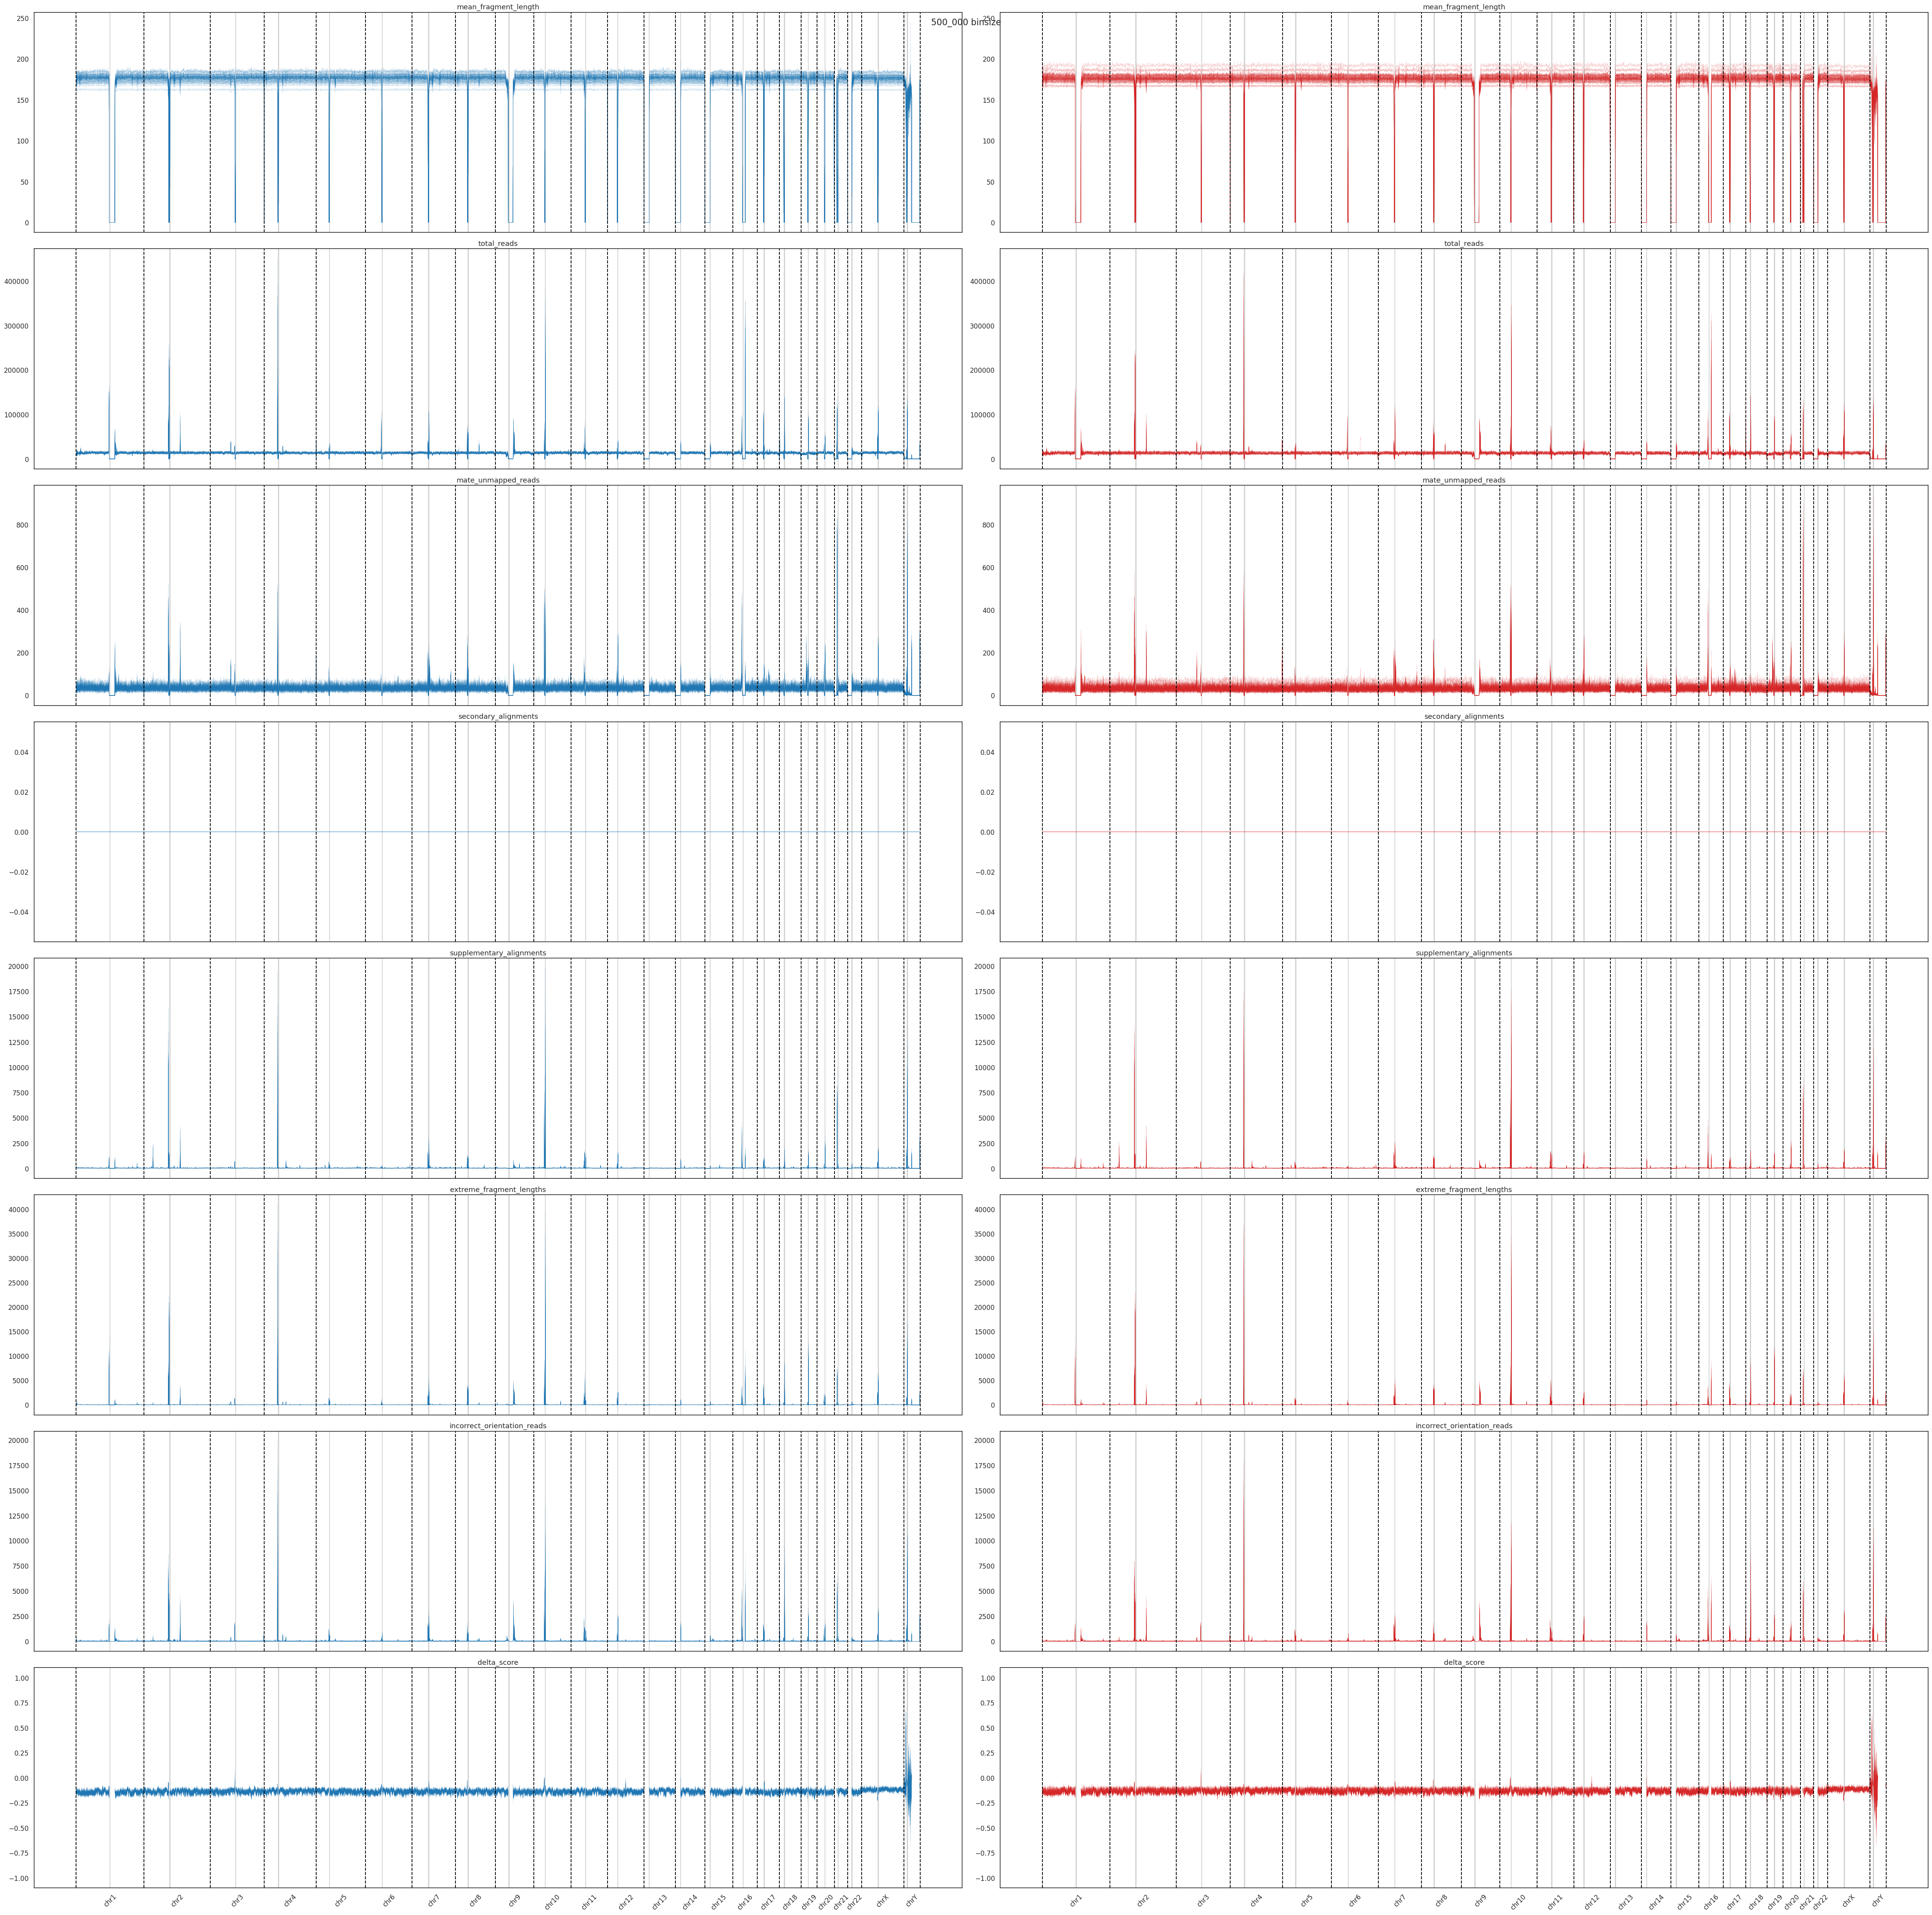

In [5]:
# list of sample dataframes
from pathlib import Path
base = Path('/home/d.gaillard/paired_ovarian/fragment_lengh_distibution/binwise_fragmentomics')

data = {}

for file in base.glob('*b500000_*.csv'):
    # get label
    PGDXID = file.stem.split('_')[0]
    lab = labels.loc[PGDXID]
    data[PGDXID] = {'label': lab}

    # read file
    df = pd.read_csv(file, sep='\t')
    data[PGDXID]['df'] = df
    

# code to plot all features 

# first deterime how many subplots we need under each other. 1 per feature
df1 = data[list(data.keys())[0]]['df']
features = df1.columns[3:].tolist()
fig, axs = plt.subplots(len(features), 2, figsize=(50, 50), sharex=True)

for i, feature in enumerate(features):
    for ax in axs[i, :]:
        ax.set_title(feature)
    for PGDXID in data.keys():
        df = data[PGDXID]['df']
        label = data[PGDXID]['label']
        if label == 'Malignant':
            is_malignant = 1
            color = 'tab:red'
        else:
            is_malignant = 0
            color = 'tab:blue'

        vector = df.loc[:, feature].values
        axs[i, is_malignant].plot(vector, alpha=0.2, color=color, linewidth=0.5)

#next for labeling the xaxis we need to know the number of bins for each chromosome.
# count the number of occurences of each chromosome in the sample_dfs[0]
chromosome_counts = df1.iloc[:, 0].value_counts().to_dict()
chromosome_ordered = df1.iloc[:, 0].unique().tolist()

# cumulatively sum the counts to get the end of each chromosome
chromosome_ends = np.cumsum([chromosome_counts[chromosome] for chromosome in chromosome_ordered])
chromosome_ends = np.insert(chromosome_ends, 0, 0)

# plot the chromosome ends as vertical lines over all the subplots
for chromosome_end in chromosome_ends:
    for ax in axs.ravel():
        ax.axvline(chromosome_end, color='black', linestyle='--')

# now we can plot the xaxis labels between the start and the end of each chromosome
# the start is the previous chromosome end, and the end is the current chromosome end using xtick labels
# set xticks to the middle of each chromosome
xticks = [(chromosome_ends[i] + chromosome_ends[i+1])/2 for i in range(len(chromosome_ends)-1)]
# set xtick labels to the chromosome names
xtick_labels = chromosome_ordered
# set xticks and xtick labels for each subplot
for ax in axs.ravel():
    ax.set_xticks(xticks)
    ax.set_xticklabels(xtick_labels, rotation=45)

## load centromere data
centromere_df = pd.read_csv('/home/d.gaillard/paired_ovarian/fragment_lengh_distibution/data/hg19_centromere.bed', sep='\t', header=None)
# drop last column
centromere_df = centromere_df.iloc[:, :-1]
# rename columns
centromere_df.columns = ['chromosome', 'start', 'end']

# draw lightgrey rectangles over the centromere regions for each chromosome first determine which bin contains the centromere start and end. then draw a rectangle over the corresponding xaxis region
for i, chromosome in enumerate(chromosome_ordered):
    centromere_start = centromere_df[centromere_df['chromosome'] == chromosome]['start'].values[0]
    centromere_end = centromere_df[centromere_df['chromosome'] == chromosome]['end'].values[0]

    # determine which row contains the centromere start and end
    start_row = np.where(df1.iloc[:, 1].values > centromere_start)[0][0] + chromosome_ends[i]
    end_row = np.where(df1.iloc[:, 2].values > centromere_end)[0][0] + chromosome_ends[i]
    # translate the start and end rows with the start of each chromsome

    # draw rectangle over the corresponding xaxis region, for each subplot. start counting
    for ax in axs.ravel():
        ax.axvspan(start_row, end_row+2, facecolor='black', alpha=0.2)
        
for axrow in axs:
    align_yaxes(axrow[0], axrow[1])
# add figure title
fig.suptitle('500_000 binsize', fontsize=16)
fig.tight_layout()
plt.show()

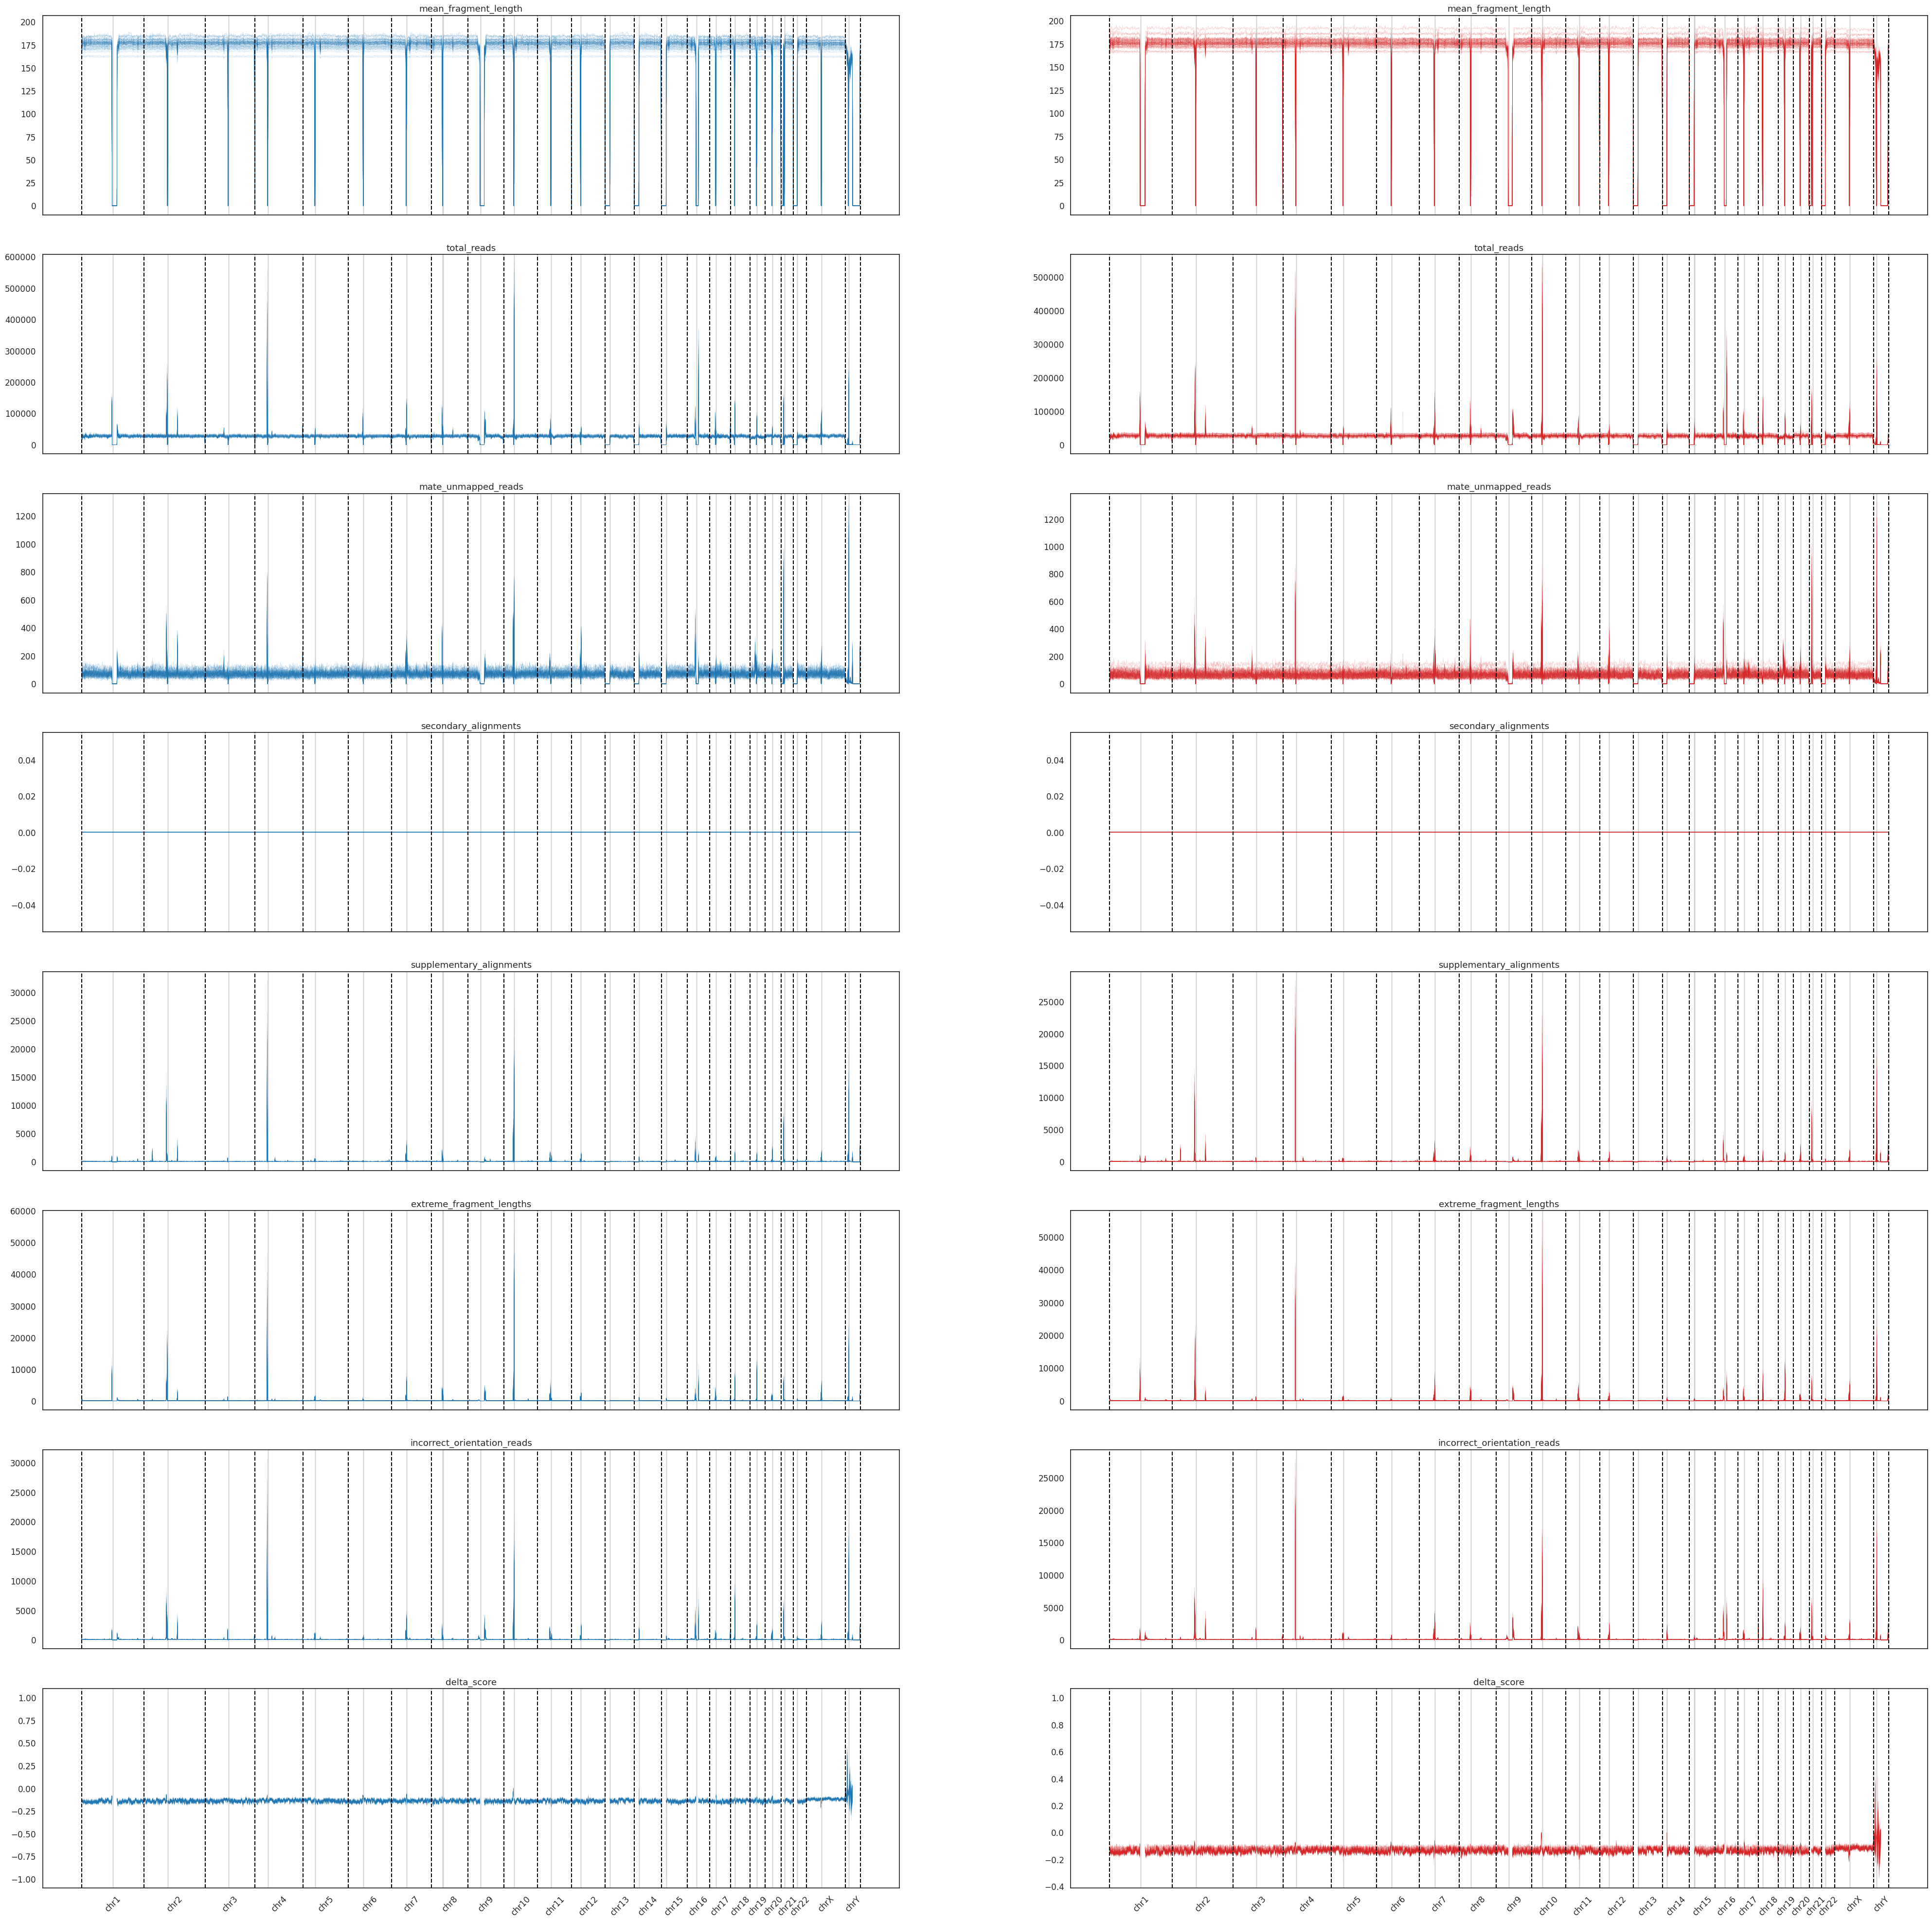

In [8]:
# list of sample dataframes
from pathlib import Path
base = Path('/home/d.gaillard/paired_ovarian/fragment_lengh_distibution/binwise_fragmentomics')

data = {}

for file in base.glob('*b1000000_*.csv'):
    # get label
    PGDXID = file.stem.split('_')[0]
    lab = labels.loc[PGDXID]
    data[PGDXID] = {'label': lab}

    # read file
    df = pd.read_csv(file, sep='\t')
    data[PGDXID]['df'] = df
    

# code to plot all features 

# first deterime how many subplots we need under each other. 1 per feature
df1 = data[list(data.keys())[0]]['df']
features = df1.columns[3:].tolist()
fig, axs = plt.subplots(len(features), 2, figsize=(50, 50), sharex=True)

for i, feature in enumerate(features):
    for ax in axs[i, :]:
        ax.set_title(feature)
    for PGDXID in data.keys():
        df = data[PGDXID]['df']
        label = data[PGDXID]['label']
        if label == 'Malignant':
            is_malignant = 1
            color = 'tab:red'
        else:
            is_malignant = 0
            color = 'tab:blue'

        vector = df.loc[:, feature].values
        axs[i, is_malignant].plot(vector, alpha=0.2, color=color, linewidth=0.5)

#next for labeling the xaxis we need to know the number of bins for each chromosome.
# count the number of occurences of each chromosome in the sample_dfs[0]
chromosome_counts = df1.iloc[:, 0].value_counts().to_dict()
chromosome_ordered = df1.iloc[:, 0].unique().tolist()

# cumulatively sum the counts to get the end of each chromosome
chromosome_ends = np.cumsum([chromosome_counts[chromosome] for chromosome in chromosome_ordered])
chromosome_ends = np.insert(chromosome_ends, 0, 0)

# plot the chromosome ends as vertical lines over all the subplots
for chromosome_end in chromosome_ends:
    for ax in axs.ravel():
        ax.axvline(chromosome_end, color='black', linestyle='--')

# now we can plot the xaxis labels between the start and the end of each chromosome
# the start is the previous chromosome end, and the end is the current chromosome end using xtick labels
# set xticks to the middle of each chromosome
xticks = [(chromosome_ends[i] + chromosome_ends[i+1])/2 for i in range(len(chromosome_ends)-1)]
# set xtick labels to the chromosome names
xtick_labels = chromosome_ordered
# set xticks and xtick labels for each subplot
for ax in axs.ravel():
    ax.set_xticks(xticks)
    ax.set_xticklabels(xtick_labels, rotation=45)

## load centromere data
centromere_df = pd.read_csv('/home/d.gaillard/paired_ovarian/fragment_lengh_distibution/data/hg19_centromere.bed', sep='\t', header=None)
# drop last column
centromere_df = centromere_df.iloc[:, :-1]
# rename columns
centromere_df.columns = ['chromosome', 'start', 'end']

# draw lightgrey rectangles over the centromere regions for each chromosome first determine which bin contains the centromere start and end. then draw a rectangle over the corresponding xaxis region
for i, chromosome in enumerate(chromosome_ordered):
    centromere_start = centromere_df[centromere_df['chromosome'] == chromosome]['start'].values[0]
    centromere_end = centromere_df[centromere_df['chromosome'] == chromosome]['end'].values[0]

    # determine which row contains the centromere start and end
    start_row = np.where(df1.iloc[:, 1].values > centromere_start)[0][0] + chromosome_ends[i]
    end_row = np.where(df1.iloc[:, 2].values > centromere_end)[0][0] + chromosome_ends[i]
    # translate the start and end rows with the start of each chromsome

    # draw rectangle over the corresponding xaxis region, for each subplot. start counting
    for ax in axs.ravel():
        ax.axvspan(start_row, end_row+2, facecolor='black', alpha=0.2)


In [9]:
df

contig     start       end  mean_fragment_length  total_reads  \
0      chr1         0   1000000            170.778584        22344   
1      chr1   1000000   2000000            178.384768        19448   
2      chr1   2000000   3000000            174.132868        28305   
3      chr1   3000000   4000000            176.219737        20099   
4      chr1   4000000   5000000            175.831756        29100   
...     ...       ...       ...                   ...          ...   
3108   chrY  55000000  56000000              0.000000            0   
3109   chrY  56000000  57000000              0.000000            0   
3110   chrY  57000000  58000000              0.000000            0   
3111   chrY  58000000  59000000            157.721085        27645   
3112   chrY  59000000  59373566            172.484482        11467   

      mate_unmapped_reads  secondary_alignments  supplementary_alignments  \
0                      55                     0                       166   
1                      53                     0                        64   
2                      49                     0                        89   
3                      48                     0                        32   
4                      81                     0                        86   
...                   ...                   ...                       ...   
3108                    0                     0                         0   
3109                    0                     0                         0   
3110                    0                     0                         0   
3111                  232                     0                      2529   
3112                   39                     0                        21   

      extreme_fragment_lengths  incorrect_orientation_reads  delta_score  
0                          386                          333    -0.136770  
1                           45                           43    -0.141608  
2                          569                           51    -0.130401  
3                           15                           23    -0.150704  
4                           52                           46    -0.152921  
...                        ...                          ...          ...  
3108                         0                            0          NaN  
3109                         0                            0          NaN  
3110                         0                            0          NaN  
3111                      2005                         2043    -0.078278  
3112                        76                           75    -0.078748  

[3113 rows x 11 columns]